# Data Import and Preprocessing 

This notebook covers how the data was imported and reshaped so that it can be later processed by keras and sklearn. 

In [113]:
# import all the libraries we will be using in this notebook 

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import PIL
from numpy import asarray
import ndjson
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.metrics import accuracy_score
from keras import backend as K
import pydot
import pickle

#### Import libraries and modules
import numpy as np
import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(42)


%matplotlib inline
import glob
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imageio as im

%matplotlib inline

![quick_draw](../images/quick_draw.png)

# About the Data

The data comes from Google Cloud's Quick! Draw! doodle dataset. Each data file has .ndjason extension and contains 
~12000 doodle images of one category. There are a total of over 300 categories in the dataset. 
![google_cloud](../images/google_cloud.png)

A typical doodle image looks like this: 

![cat_doodle](../images/cat_doodle.png)
    
    
Note the different colors on the image. When I demo-ed the Qucik! Draw! game in a video in notebook **1. Problem Statement**, each drawing was black and white. However here we see mutlitple colors. This is because the Quick! Draw! website saves time data in addition to the images you draw. Each stroke on the image is color coded to correspoind to consequtive time-steps at which the stroke was drawn. I will not be using time data for this project. 

The data for a full doodle image is broken down into smaller stroke-images corresponding to timesteps. So in order to get the complete doodle image, we need to implement a for loop that will put all the stroke-images together into one plot. The function below achieves this task in addition to a few other data preprocessing subtasks. 
    

# Import And Transform Images 

In [96]:
# This function imports the data, preprocesses it and transforms it into keras-friendly shape as well as saves each image as a .png file into a local directory


def img_import_transform(raw_data, path, label):
    
    # load from file-like objects
    with open(raw_data) as f:
        data = ndjson.load(f)
    
    drawings = data[9]['drawing']
    
    # reconstruct the doodles from stroke-images into a full plt plot-image 
    for drawing in drawings:
        plt.plot(drawing[0], drawing[1])
    
    # save the plt plots for each doodle as an image in .png format in a local folder 
    images = []
    for i in range(1,5001):
        image = data[i]['drawing']
        images.append(image)
    count = 0
    for image in images:
        count += 1
        for drawing in image:
            plt.plot(drawing[0], drawing[1], c = 'k')
            plt.axis('off')    
        plt.savefig(path+str(count)+'_'+data[0]['word']+'.png')
        plt.close()
    
    lst = []
    
    
    # use the Pillow library to transform the images 
    # by turning them to greyscale and resizing them into a 100 by 100 shape
    for i in os.listdir(path):
    # load the image
            image = Image.open(path+str(i))
            #img_resized = image.resize((100,100))
            image.thumbnail((100,100))
            grey_scale = image.convert(mode = 'L')
            pic = grey_scale.transpose(Image.FLIP_TOP_BOTTOM)
            dat = asarray(pic)
            lst.append(dat)
    
    # create a dataset with all images data 
    data = np.stack(lst, axis = 0)
    data = data.astype('float32')
    # standardize the data 
    data /= 255.
    data_label = np.full((5000,), label)
    
    return pic, data, data_label


Each full doodle image originally had the shape (288, 432, 4). This size is too large therefore I have resized each image into (100, 100, 1) shape. 

There are 5 categories of picures I want my model to classify: cats, alarm clocks, airplanes, houses and trees. The cats and alarm clocks often look very similar so I wanted to include these classes because I assume that the model willbe more likely to make errorneous classifications on these. The rest of the doodle categories I judged to be distinct enough that I assume the model will classify correctly pretty easily. Thus, given the 5 categories of images, **this project is a multiclass classification problem with 5 classes**. These are some examples of what a doodle image looks like from each category:

![classes](../images/classes.png)

In [97]:
# set the paths of directories from which data is imported and into which images are saved

cat_raw = './data/raw_data/full_simplified_cat.ndjson'
cat_path = './data/images_data/cat/'

tree_raw = './data/raw_data/full_simplified_tree.ndjson'
tree_path = './data/images_data/tree/'

house_raw = './data/raw_data/full_simplified_house.ndjson'
house_path = './data/images_data/house/'

airplane_raw = './data/raw_data/full_simplified_airplane.ndjson'
airplane_path = './data/images_data/airplane/'

clock_raw = './data/raw_data/full_simplified_alarm clock.ndjson'
clock_path = './data/images_data/clock/'

(5000, 66, 100)
(5000,)


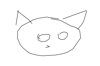

In [98]:
pic, cats_data, cats_label = img_import_transform(cat_raw, cat_path, label = 0)
print(cats_data.shape)
print(cats_label.shape)
cats_label[0:3]
pic

In [26]:
# cats_data = cats_data[0:100]
# cats_data.shape

(100, 100, 100)

(5000, 66, 100)
(5000,)


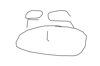

In [99]:
pic, clock_data, clock_label = img_import_transform(clock_raw,clock_path, label = 1)
print(clock_data.shape)
print(clock_label.shape)
clock_label[0:3]
pic

In [30]:
# clock_data = clock_data[0:100]
# clock_data.shape

(100, 66, 100)

(5000, 66, 100)
(5000,)


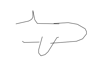

In [100]:
pic, airplane_data, airplane_label = img_import_transform(airplane_raw, airplane_path, label = 2)
print(airplane_data.shape)
print(airplane_label.shape)
airplane_label[0:3]
pic

In [29]:
# airplane_data = airplane_data[0:100]
# airplane_data.shape

(100, 100, 100)

(5000, 66, 100)
(5000,)


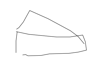

In [101]:
pic, house_data, house_label = img_import_transform(house_raw, house_path, label = 3)
print(house_data.shape)
print(house_label.shape)
house_label[0:3]
pic

In [31]:
# house_data = house_data[0:100]
# house_data.shape

(100, 100, 100)

(5000, 66, 100)
(5000,)


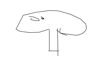

In [102]:
pic, tree_data, tree_label = img_import_transform(tree_raw, tree_path, label = 4)
print(tree_data.shape)
print(tree_label.shape)
tree_label[0:3]
pic

In [33]:
# tree_data = tree_data[0:100]
# tree_data.shape

(100, 100, 100)

In [103]:
X = asarray(list(cats_data)+list(clock_data)+list(airplane_data)+list(house_data)+list(tree_data))
y = asarray(list(cats_label)+list(clock_label)+list(airplane_label)+list(house_label)+list(tree_label))
print(X.shape)
print(y.shape)

(25000, 66, 100)
(25000,)


In [114]:
### Load data into file
with open("./data/processed_data/X.pkl","wb") as f:
    pickle.dump(X,f)

with open("./data/processed_data/y.pkl","wb") as f:
    pickle.dump(y,f)